# Modelado de preferencias del vino #

**David Borja**  
aborja@unal.edu.co  
Universidad Nacional de Colombia  
Facultad de Minas  
Medellín, Colombia  

**Bibliografía**  
Cortez, P., Cerderira, A., Almeida, F., Matos, T., Reis, J. (2009). Modeling wine preferences by data mining from physicochemical properties.

** Fuente de los datos**: [Wine Quality Red](http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv)

# Definición del problema real #

Hoy en día, el vino está siendo disfrutado incrementalmente por un amplio rango de consumidores. Portugal se encuentra dentro del top 10 de exportadores de vino, con el 3.17% del mercado. Para apoyar el crecimiento, la industria del vino esta invirtiendo en nuevas tecnologías para la producción y comercialización. La certificación del vino se realiza generalmente por medio de pruebas sensoriales y psicoquímicas. Las pruebas de laboratorio rutinarias que son usadas para caracterizar el vino incluyen determinación de la densidad, alcohol o valores de pH, mientras que las pruebas sensoriales confían principalmente de expertos humanos, por lo que la clasificación del vino es una tarea difícil.


# Definición del problema en términos de los datos #

La muestra contiene 1599 ejemplos de pruebas de vino rojo de "Vinho Verde" en el norte de Portugal. Las clases están ordenadas y no balanceadas, es decir, hay mas vinos normales que excelentes o malos. Cada registro contiene 11 variables que determinan la calidad de la uva:

- **fixed acidity** - Conjunto de los ácidos naturales procedentes de la uva
- **volatile acidity** - Conjunto de ácidos formados durante la fermentación
- **citric acid** - Utilizado para la acidificación química de los vinos
- **residual sugar** -  Mezcla de glucosa y fructosa de la uva
- **chlorides** -  Precipitación de los cloruros presentes en el vino
- **free sulfur dioxide** - Óxido usado como aditivo del vino
- **total sulfur dioxide** - Óxido usado como aditivo del vino
- **density** - Relación entre la masa y el agua
- **pH** - Medida de la acidez o alcalinidad
- **sulphates** - Sales derivadas del ácido sulfúrico
- **alcohol** - Nivel de alcohol

En términos de los datos, se desea pronosticar la **calidad** del vino (quality) con una calificación entre 0 (malo) y 10 (excelente)


# Exploración

In [19]:
%matplotlib inline
# Importar la librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
# Importar el dataset
dataset = pd.read_csv('winequality-red.csv', sep = ';')
random_state = 123

In [21]:
# Imprimir los primeros registros del dataset
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [25]:
# Revolver el dataset (tres veces)
from sklearn.utils import shuffle
dataset = shuffle(dataset, random_state = random_state)
dataset = shuffle(dataset)
dataset = shuffle(dataset)

In [26]:
# Imprimir los primeros registros del dataset
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
192,6.8,0.63,0.12,3.8,0.099,16.0,126.0,0.99690,3.28,0.61,9.5,5
1410,6.6,0.96,0.00,1.8,0.082,5.0,16.0,0.99360,3.50,0.44,11.9,6
696,7.0,0.65,0.02,2.1,0.066,8.0,25.0,0.99720,3.47,0.67,9.5,6
1092,7.0,0.54,0.09,2.0,0.081,10.0,16.0,0.99479,3.43,0.59,11.5,6
1269,5.5,0.49,0.03,1.8,0.044,28.0,87.0,0.99080,3.50,0.82,14.0,8


In [27]:
# Obtener las variables dependientes (X) y la variable dependiente (y)
X = dataset.iloc[:, 0:11].values
y = dataset.iloc[:, 11].values

In [28]:
# Mostrar las dimensiones del dataset
dataset.shape

(1599, 12)

In [29]:
# Describir el dataset
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [30]:
# Imprimir la distribución de la clase (calidad) 
dataset.groupby('quality').size()

quality
3     10
4     53
5    681
6    638
7    199
8     18
dtype: int64

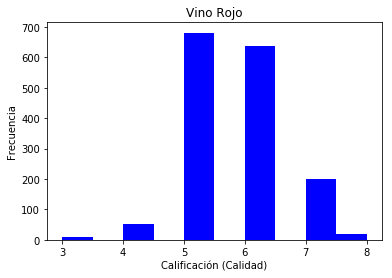

In [163]:
# Distribución de las clases y su frecuencia
quality = dataset['quality']
plt.hist(quality, color = 'b')
plt.xlabel('Calificación (Calidad)')
plt.ylabel('Frecuencia')
plt.xticks(range(3, 9))
plt.title('Vino Rojo')
plt.show()

In [100]:
# Cross-validation para seleccionar los datos
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = random_state)

In [36]:
# Escalar los datos
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [42]:
# Evaluación de los diferentes modelos
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RDF', RandomForestClassifier()))
models.append(('SVM', SVC()))

results = []
names = []

# Imprimir la precisión de cross-validation para cada modelo (media y std)
for name, model in models:
    kfold = StratifiedKFold(n_splits = 6, shuffle = True, random_state = random_state)
    cv_results = cross_val_score(estimator = model, X = X_train, y = y_train, cv = kfold, scoring = 'accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.573187 (0.025480)
LDA: 0.593745 (0.047236)
KNN: 0.548004 (0.032431)
NB: 0.531774 (0.047043)
CART: 0.578805 (0.024453)


/Users/adborja/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


RDF: 0.646480 (0.035536)
SVM: 0.559093 (0.031469)


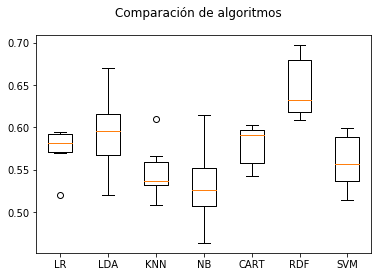

In [43]:
# Comparación de algoritmos
fig = plt.figure()
fig.suptitle('Comparación de algoritmos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Evaluación del modelo usando Regresión Logística

In [44]:
# Usando clasificador de Regresión Logística
classifier = LogisticRegression(random_state = random_state)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=123, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [45]:
# Realizando predicción:
y_pred = classifier.predict(X_test)

In [47]:
# Obteniendo matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[  0,   0,   1,   0,   0,   0],
       [  0,   0,  14,   6,   0,   0],
       [  0,   0, 186,  51,   0,   0],
       [  0,   0,  83, 123,   0,   0],
       [  0,   0,   2,  60,   0,   0],
       [  0,   0,   0,   7,   0,   0]])

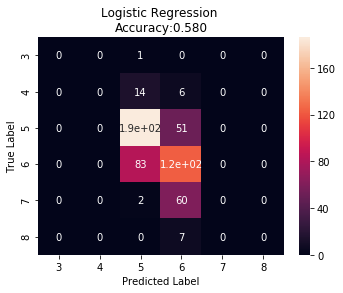

In [50]:
# Graficar la matriz de confusion
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import seaborn as sns
cm_df = pd.DataFrame(cm,
                     index = ['3', '4', '5', '6', '7', '8'],
                     columns = ['3', '4', '5', '6', '7', '8'])

plt.figure(figsize = (5.5, 4))
sns.heatmap(cm_df, annot = True)
plt.title('Logistic Regression \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Evaluación del modelo usando KNN

In [51]:
# Usando clasificador de KNN
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [52]:
# Realizando predicción:
y_pred = classifier.predict(X_test)

In [53]:
# Obteniendo matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[  0,   0,   1,   0,   0,   0],
       [  0,   1,  12,   7,   0,   0],
       [  0,   0, 168,  65,   4,   0],
       [  0,   0,  71, 121,  14,   0],
       [  0,   0,   7,  33,  22,   0],
       [  0,   0,   0,   4,   3,   0]])

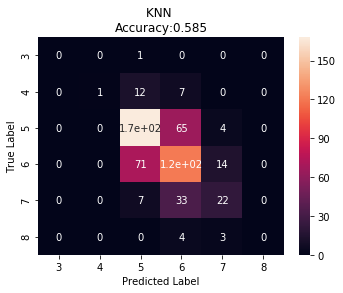

In [55]:
# Graficar la matriz de confusion
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import seaborn as sns
cm_df = pd.DataFrame(cm,
                     index = ['3', '4', '5', '6', '7', '8'],
                     columns = ['3', '4', '5', '6', '7', '8'])

plt.figure(figsize = (5.5, 4))
sns.heatmap(cm_df, annot = True)
plt.title('KNN \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Evaluación del modelo usando Naive Bayes #

In [57]:
# Usando el clasificador de Naive Bayes
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None)

In [58]:
# Realizando predicción:
y_pred = classifier.predict(X_test)

In [59]:
# Obteniendo matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[  0,   0,   0,   1,   0,   0],
       [  4,   0,   9,   6,   0,   1],
       [  4,   5, 152,  71,   5,   0],
       [  3,   3,  60, 111,  23,   6],
       [  0,   0,   0,  29,  23,  10],
       [  0,   0,   0,   3,   4,   0]])

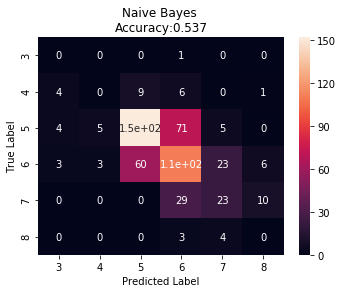

In [60]:
# Graficar la matriz de confusion
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import seaborn as sns
cm_df = pd.DataFrame(cm,
                     index = ['3', '4', '5', '6', '7', '8'],
                     columns = ['3', '4', '5', '6', '7', '8'])

plt.figure(figsize = (5.5, 4))
sns.heatmap(cm_df, annot = True)
plt.title('Naive Bayes \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Evaluación del modelo usando Árbol de decisión #

In [61]:
# Usando el clasificador de Árbol de decisión
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [62]:
# Realizando predicción:
y_pred = classifier.predict(X_test)

In [64]:
# Obteniendo matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[  0,   0,   0,   1,   0,   0],
       [  1,   1,  10,   7,   1,   0],
       [  4,   3, 159,  61,   9,   1],
       [  0,   8,  53, 116,  24,   5],
       [  0,   1,   2,  27,  26,   6],
       [  0,   0,   0,   3,   4,   0]])

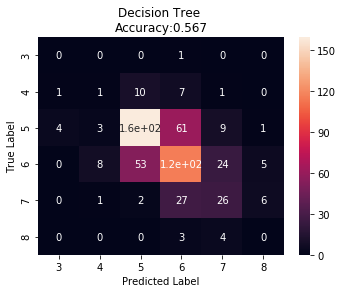

In [65]:
# Graficar la matriz de confusion
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import seaborn as sns
cm_df = pd.DataFrame(cm,
                     index = ['3', '4', '5', '6', '7', '8'],
                     columns = ['3', '4', '5', '6', '7', '8'])

plt.figure(figsize = (5.5, 4))
sns.heatmap(cm_df, annot = True)
plt.title('Decision Tree \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Evaluación del modelo usando Bosque Aleatorio #

In [66]:
# Usando el clasificador de Random Forest
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = random_state)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=123, verbose=0, warm_start=False)

In [67]:
# Realizando predicción:
y_pred = classifier.predict(X_test)

In [68]:
# Obteniendo matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[  0,   0,   0,   1,   0,   0],
       [  0,   1,  13,   6,   0,   0],
       [  1,   1, 185,  49,   1,   0],
       [  0,   1,  63, 132,  10,   0],
       [  0,   0,   4,  27,  28,   3],
       [  0,   0,   0,   3,   4,   0]])

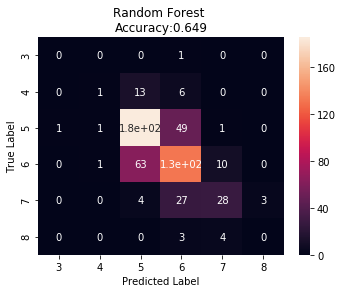

In [69]:
# Graficar la matriz de confusion
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import seaborn as sns
cm_df = pd.DataFrame(cm,
                     index = ['3', '4', '5', '6', '7', '8'],
                     columns = ['3', '4', '5', '6', '7', '8'])

plt.figure(figsize = (5.5, 4))
sns.heatmap(cm_df, annot = True)
plt.title('Random Forest \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Evaluación del modelo usando SVM #

In [70]:
# Usando el clasificador de Support Vector Machine
classifier = SVC(kernel = 'rbf', random_state = random_state)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=123, shrinking=True,
  tol=0.001, verbose=False)

In [71]:
# Realizando predicción:
y_pred = classifier.predict(X_test)

In [72]:
# Obteniendo matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[  0,   0,   1,   0,   0,   0],
       [  0,   0,  17,   3,   0,   0],
       [  0,   0, 194,  43,   0,   0],
       [  0,   0,  95, 111,   0,   0],
       [  0,   0,   3,  59,   0,   0],
       [  0,   0,   0,   7,   0,   0]])

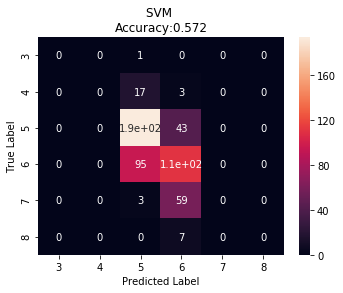

In [73]:
# Graficar la matriz de confusion
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import seaborn as sns
cm_df = pd.DataFrame(cm,
                     index = ['3', '4', '5', '6', '7', '8'],
                     columns = ['3', '4', '5', '6', '7', '8'])

plt.figure(figsize = (5.5, 4))
sns.heatmap(cm_df, annot = True)
plt.title('SVM \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Evaluación del modelo con K-Folds #

In [83]:
# Aplicando K-Folds para el clasificador de SVM
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 6)
print('Mean: {0:.3f} '.format(accuracies.mean()))
print('Std: {0:.3f}'.format(accuracies.std()))

Mean: 0.565 
Std: 0.024


# Evaluación del modelo usando Grid Search #

In [84]:
# Usando el mejor clasificador (Random Forest)
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = random_state)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=123, verbose=0, warm_start=False)

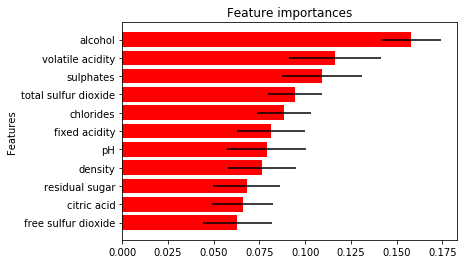

In [85]:
# Graficando la matriz de importancias
importances = classifier.feature_importances_
names = dataset.columns
importances, names = zip(*sorted(zip(importances, names)))
std = np.std([tree.feature_importances_ for tree in classifier.estimators_],
             axis = 0)
indices = np.argsort(importances)[::-1]

plt.figure()
plt.title("Feature importances")
plt.barh(range(len(names)), importances, align = 'center', color = 'r', xerr = std[indices])
plt.yticks(range(len(names)), names)
plt.ylabel('Features')
plt.show()

# Selección de Hiper-parámetros para Random Forest #

In [86]:
# Asignando posible combinación de parámetros para evaluar (Random Forest)
parameters = [{'criterion': ['gini'], 'n_estimators': [10, 15, 20, 50, 100, 200, 300, 400, 500]},
              {'criterion': ['entropy'], 'n_estimators': [10, 15, 20, 50, 100, 200, 300, 400, 500], 'max_features': ['auto', 'sqrt', 'log2', None]}]

In [89]:
# Aplicando GridSearch
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 6,
                           n_jobs = -1)

In [93]:
# Obteniendo precision y mejores hiperparametros
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

In [95]:
print('Best Accuracy: {0:.3f}'.format(best_accuracy))
print(best_parameters)

Best Accuracy: 0.680
{'criterion': 'gini', 'n_estimators': 300}


In [96]:
# Ajustando el modelo Random Forest con el resultado de GridSearch
classifier = RandomForestClassifier(n_estimators = 300, criterion = 'gini', random_state = random_state)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=123, verbose=0, warm_start=False)

In [97]:
# Realizando predicción:
y_pred = classifier.predict(X_test)

In [98]:
# Obteniendo matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[  0,   0,   0,   1,   0,   0],
       [  0,   0,  13,   7,   0,   0],
       [  0,   0, 189,  48,   0,   0],
       [  0,   1,  51, 140,  14,   0],
       [  0,   0,   1,  33,  28,   0],
       [  0,   0,   0,   3,   4,   0]])

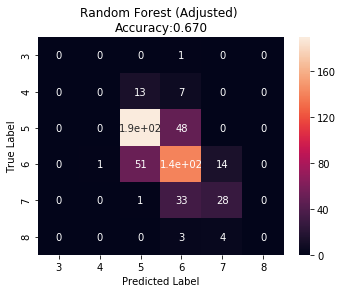

In [99]:
# Graficar la matriz de confusion
cm_df = pd.DataFrame(cm,
                     index = ['3', '4', '5', '6', '7', '8'],
                     columns = ['3', '4', '5', '6', '7', '8'])

plt.figure(figsize = (5.5, 4))
sns.heatmap(cm_df, annot = True)
plt.title('Random Forest (Adjusted) \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Selección de Hiper-parámetros para SVM #

In [104]:
# Usando el clasificador de Support Vector Machine
classifier = SVC(kernel = 'rbf', random_state = random_state)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=123, shrinking=True,
  tol=0.001, verbose=False)

In [105]:
# Asignando posible combinación de parámetros para evaluar (SVM)
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.7, 0.8, 0.9, 1.0]}]

In [106]:
# Aplicando GridSearch
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 6,
                           n_jobs = -1)

In [107]:
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

In [108]:
print('Best Accuracy: {0:.3f}'.format(best_accuracy))
print(best_parameters)

Best Accuracy: 0.588
{'C': 1000, 'kernel': 'linear'}


In [110]:
# Ajustando el modelo SVM con el resultado de GridSearch
classifier = SVC(kernel = 'linear', C = 1000, random_state = random_state)
classifier.fit(X_train, y_train)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=123, shrinking=True,
  tol=0.001, verbose=False)

In [111]:
# Realizando predicción:
y_pred = classifier.predict(X_test)

In [112]:
# Obteniendo matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[  0,   0,   1,   0,   0,   0],
       [  0,   0,  14,   6,   0,   0],
       [  0,   0, 165,  72,   0,   0],
       [  0,   0,  69, 119,  18,   0],
       [  0,   0,   3,  41,  18,   0],
       [  0,   0,   1,   3,   3,   0]])

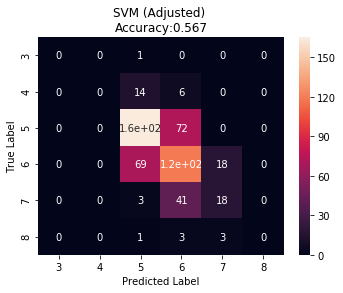

In [114]:
# Graficar la matriz de confusion
cm_df = pd.DataFrame(cm,
                     index = ['3', '4', '5', '6', '7', '8'],
                     columns = ['3', '4', '5', '6', '7', '8'])

plt.figure(figsize = (5.5, 4))
sns.heatmap(cm_df, annot = True)
plt.title('SVM (Adjusted) \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Selección de Hiper-parámetros para KNN #

In [129]:
# Usando el clasificador de KNN
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [119]:
# Asignando posible combinación de parámetros para evaluar (KNN)
parameters = [{'n_neighbors': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20], 'metric': ['minkowski']}]

In [120]:
# Aplicando GridSearch
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 6,
                           n_jobs = -1)

In [121]:
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

In [122]:
print('Best Accuracy: {0:.3f}'.format(best_accuracy))
print(best_parameters)

Best Accuracy: 0.509
{'metric': 'minkowski', 'n_neighbors': 8}


In [123]:
# Ajustando el modelo KNN con el resultado de GridSearch
classifier = KNeighborsClassifier(n_neighbors = 8, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='uniform')

In [124]:
# Realizando predicción:
y_pred = classifier.predict(X_test)

In [127]:
# Obteniendo matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[  0,   0,   0,   1,   0,   0],
       [  0,   1,  13,   6,   0,   0],
       [  0,   0, 174,  57,   6,   0],
       [  0,   0, 118,  75,  13,   0],
       [  1,   0,  14,  35,  12,   0],
       [  0,   0,   3,   2,   2,   0]])

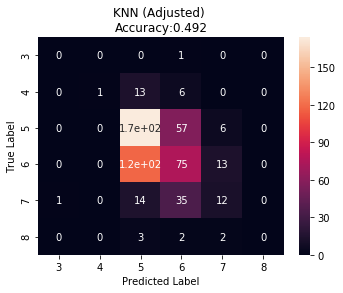

In [128]:
# Graficar la matriz de confusion
cm_df = pd.DataFrame(cm,
                     index = ['3', '4', '5', '6', '7', '8'],
                     columns = ['3', '4', '5', '6', '7', '8'])

plt.figure(figsize = (5.5, 4))
sns.heatmap(cm_df, annot = True)
plt.title('KNN (Adjusted) \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Selección de Hiper-Parámetros para Árbol de decisión #

In [130]:
# Usando el clasificador de Arbol de decision
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = random_state)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best')

In [131]:
# Asignando posible combinación de parámetros para evaluar (DecisionTree)
parameters = [{'criterion': ['entropy', 'gini'], 'splitter': ['best', 'random']}]

In [132]:
# Aplicando GridSearch
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 6,
                           n_jobs = -1)

In [133]:
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

In [134]:
print('Best Accuracy: {0:.3f}'.format(best_accuracy))
print(best_parameters)

Best Accuracy: 0.586
{'criterion': 'entropy', 'splitter': 'random'}


In [135]:
# Ajustando el modelo DecisionTree con el resultado de GridSearch
classifier = DecisionTreeClassifier(criterion = 'entropy', splitter = 'random', random_state = random_state)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='random')

In [136]:
# Realizando predicción:
y_pred = classifier.predict(X_test)

In [137]:
# Obteniendo matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[  0,   1,   0,   0,   0,   0],
       [  0,   3,   9,   7,   1,   0],
       [  0,   8, 166,  61,   1,   1],
       [  0,   3,  50, 124,  28,   1],
       [  0,   1,   5,  24,  31,   1],
       [  0,   0,   1,   4,   2,   0]])

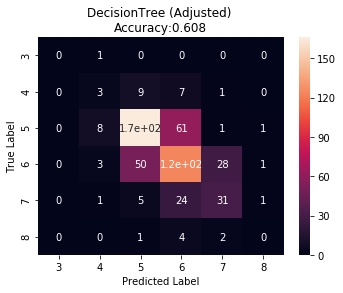

In [138]:
# Graficar la matriz de confusion
cm_df = pd.DataFrame(cm,
                     index = ['3', '4', '5', '6', '7', '8'],
                     columns = ['3', '4', '5', '6', '7', '8'])

plt.figure(figsize = (5.5, 4))
sns.heatmap(cm_df, annot = True)
plt.title('DecisionTree (Adjusted) \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Obteniendo reportes de clasificación (KNN, DecisionTree, SVM, RandomForest) - Comparación de modelos # 

In [ ]:
# Realizando reportes de clasificación
from sklearn.metrics import classification_report
target_names = ['score 3', 'score 4', 'score 5', 'score 6', 'score 7', 'score 8']

In [147]:
# Reporte de clasificacion (KNN)
classifier = KNeighborsClassifier(n_neighbors = 8, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

# Realizando predicción:
y_pred = classifier.predict(X_test)

class_report = classification_report(y_test, y_pred, target_names = target_names)

print(class_report)

             precision    recall  f1-score   support

    score 3       0.00      0.00      0.00         1
    score 4       1.00      0.05      0.10        20
    score 5       0.54      0.73      0.62       237
    score 6       0.43      0.36      0.39       206
    score 7       0.36      0.19      0.25        62
    score 8       0.00      0.00      0.00         7

avg / total       0.48      0.49      0.46       533



/Users/adborja/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [148]:
# Reporte de clasificacion (DecisionTree)
classifier = DecisionTreeClassifier(criterion = 'entropy', splitter = 'random', random_state = random_state)
classifier.fit(X_train, y_train)

# Realizando predicción:
y_pred = classifier.predict(X_test)

class_report = classification_report(y_test, y_pred, target_names = target_names)

print(class_report)

             precision    recall  f1-score   support

    score 3       0.00      0.00      0.00         1
    score 4       0.19      0.15      0.17        20
    score 5       0.72      0.70      0.71       237
    score 6       0.56      0.60      0.58       206
    score 7       0.49      0.50      0.50        62
    score 8       0.00      0.00      0.00         7

avg / total       0.60      0.61      0.60       533



/Users/adborja/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [149]:
# Reporte de clasificacion (SVM)
classifier = SVC(kernel = 'linear', C = 1000, random_state = random_state)
classifier.fit(X_train, y_train)

# Realizando predicción:
y_pred = classifier.predict(X_test)

class_report = classification_report(y_test, y_pred, target_names = target_names)

print(class_report)

             precision    recall  f1-score   support

    score 3       0.00      0.00      0.00         1
    score 4       0.00      0.00      0.00        20
    score 5       0.65      0.70      0.67       237
    score 6       0.49      0.58      0.53       206
    score 7       0.46      0.29      0.36        62
    score 8       0.00      0.00      0.00         7

avg / total       0.53      0.57      0.55       533



/Users/adborja/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [150]:
# Reporte de clasificacion (RandomForest)
classifier = RandomForestClassifier(n_estimators = 300, criterion = 'gini', random_state = random_state)
classifier.fit(X_train, y_train)

# Realizando predicción:
y_pred = classifier.predict(X_test)

class_report = classification_report(y_test, y_pred, target_names = target_names)

print(class_report)

             precision    recall  f1-score   support

    score 3       0.00      0.00      0.00         1
    score 4       0.00      0.00      0.00        20
    score 5       0.74      0.80      0.77       237
    score 6       0.61      0.68      0.64       206
    score 7       0.62      0.47      0.53        62
    score 8       0.00      0.00      0.00         7

avg / total       0.64      0.67      0.65       533



/Users/adborja/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Conclusiones #

De acuerdo a los reportes de clasificación anteriores, se puede observar que el mejor modelo para la clasificación de la calidad de los vinos es usando Random Forest con una precisión del 67% en la predicción.

Se puede notar que para las clases 5, 6 y 7 fue donde mejores precisiones se logró (~0.74, ~0.61 y ~0.62 en el mejor de los casos (Random Forest) ya que se encontraron mas muestras en los datos para dichas clases (el conjunto de datos no esta balanceado, por lo que hay mas vinos normales que malos o excelentes.

El modelo mejoró cuando se hizo la búsqueda de hiper-parámetros usando GridSearch para obtener la mejor combinación de parámetros para el entrenamiento del modelo, sin embargo, para SVM, el tiempo de cómputo se incrementó considerablemente obteniendo dichos parámetros.